In [24]:
#!/usr/bin/env Python
# coding=utf-8
import os
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

path = "Algorithm/"

In [55]:
def draw_usage(dic):
    peak = dic['peak']
    usageTime = dic['usageTime']
    peak = np.array(peak).T
    usageTime = np.array(usageTime).T
    usage_aver = [sum(usage) / len(usage) for usage in usageTime]
    percentile = usage_aver / peak
    Edge = [i for i in range(len(usage_aver))]
    plt.xlabel('edgeID')
    plt.ylabel('percentileUsage')
    plt.plot(Edge, percentile, label = dic['alg_name'])
    plt.legend(loc='lower left')

In [56]:
def parse_data(filename):
    result_name = os.path.split(filename)[-1].split('_')
    result = {}
    result['alg_name'] = result_name[0]
    result['node'] = int(result_name[3])
    result['period'] = int(result_name[5])
    result['lambda'] = int(result_name[7])
    peak = list()
    usageTime = list()
    with open(filename, 'r+') as file_to_read:
        lines = file_to_read.readline() # 整行读取数据
        lines = file_to_read.readline()
        result['runtime'] = float(lines.split()[0])
        lines = file_to_read.readline()
        result['receiveNum'] = int(lines.split()[0])
        lines = file_to_read.readline()
        result['reqNum'] = int(lines.split()[0])
        lines = file_to_read.readline()
        result['income'] = int(lines.split()[0])
        lines = file_to_read.readline()
        result['cost'] = int(lines.split()[0])
        while True:
            lines = file_to_read.readline() # 整行读取数据
            if not lines:
                break
            if "--peakPerEdge--" in lines:
                break
        lines = file_to_read.readline()
        peak = [float(i) for i in lines.split()]
        while True:
            lines = file_to_read.readline() # 整行读取数据
            if not lines:
                break
            if "--volPerTimeEdge--" in lines:
                break
        while True:
            lines = file_to_read.readline() # 整行读取数据
            if not lines:
                break
            u_temp = [float(i) for i in lines.split()]
            usageTime.append(u_temp)
        peak = np.array(peak)
        usageTime = np.array(usageTime)
    result['peak'] = peak
    result['usageTime'] = usageTime
    return result

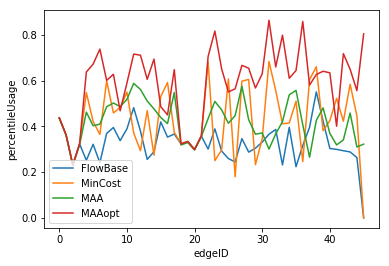

In [57]:
fs = os.listdir(path)
# usageTime = list()
for fl in fs:
    temper_path = os.path.join(path, fl)
    if "DS_Store" in temper_path:
        continue
    draw_usage(parse_data(temper_path))